# Oracle Machine Learning for Python - Introduction
Oracle Machine Learning for Python (OML4Py), a component of the Oracle Advanced Analytics option to Oracle Database Enterprise Edition, makes the open source Python scripting language and environment ready for the enterprise and big data. Designed for problems involving both large and small volumes of data, Oracle Machine Learning for Python integrates Python with Oracle Database, allowing users to execute Python commands and scripts for statistical, machine learning, and graphical analyses on database tables and views using Python syntax. Many familiar Python functions are overloaded and translate Python functions into SQL for in-database execution, as well as new automated machine learning capabilities. 
![title](img/OML4P_icon.jpg)
In this notebook, we highlight a few of the features of OML4Py:
- connect to Oracle Database
- create database tables
- use the transparency layer
- rank attributes for predictive value using the in-database attribute importance algorithm
- build a predictive model
- score data using this model

# Import the OML4Py library and connect to Oracle Database
To use OML4Py, first import the package ***oml***. OML4Py supports a variety of connection specification options, including Oracle Wallet. Once connected to an Oracle Database that has OML4Py installed, invoking ***oml.isconnected*** returns true. 

In [2]:
import oml
#oml.connect("pyquser","pyquser",
#            '(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=localhost)(PORT=1521))(CONNECT_DATA=(service_name=OAA1)))')

oml.connect(user="pyquser",password="Pyquser19#Pyquser19#",dsn='(DESCRIPTION=(ADDRESS=(PROTOCOL=TCP)(HOST=130.61.215.115)(PORT=1521))(CONNECT_DATA=(service_name=pdb1.sub12041412512.bdcevcn.oraclevcn.com)))')

oml.isconnected()

True

# Create a Pandas DataFrame and load into Oracle Database
We have a couple of options for loading data into Oracle Database. In this first example, we load the _iris_ data and combine target and predictors into a single DataFrame, which matches the form the data would have as a database table. This DataFrame can then be loaded into Oracle Database using the ***push*** function, which creates a temporary table. Such temporary tables will be automatically deleted when the database connection is terminated unless saved in a datastore (covered in another notebook). 

In [2]:
from sklearn.datasets import load_iris
from sklearn import linear_model
import pandas as pd

iris = load_iris()
x = pd.DataFrame(iris.data, 
                 columns = ["SEPAL_LENGTH", "SEPAL_WIDTH", "PETAL_LENGTH", "PETAL_WIDTH"])
y = pd.DataFrame(list(map(lambda x: {0:'setosa', 1: 'versicolor', 2:'virginica'}[x], iris.target)), 
                 columns = ['Species'])
iris_df = pd.concat([x,y], axis=1)

IRIS_TMP = oml.push(iris_df)
print("Shape:",IRIS_TMP.shape)
print("Columns:",IRIS_TMP.columns)
IRIS_TMP.head(4)

Shape: (150, 5)
Columns: ['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH', 'Species']


   SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa

We can also create a persistent table using the ***create*** function and specifying a tablename, "IRIS".

In [3]:
try:
    oml.drop(table="IRIS")
except:
    pass
IRIS = oml.create(iris_df, table="IRIS")
print("Shape:",IRIS.shape)
IRIS.head(4)

Shape: (150, 5)


   SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH  PETAL_WIDTH Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa

See what functions are available on IRIS as an OML DataFrame.

In [4]:
res = [x for x in IRIS.__dir__() if not x.startswith('_')]
res.sort()
res

['KFold',
 'append',
 'columns',
 'concat',
 'corr',
 'count',
 'create_view',
 'crosstab',
 'cumsum',
 'describe',
 'drop',
 'drop_duplicates',
 'dropna',
 'dtypes',
 'head',
 'kurtosis',
 'materialize',
 'max',
 'mean',
 'median',
 'merge',
 'min',
 'nunique',
 'pivot_table',
 'pull',
 'rename',
 'round',
 'select_types',
 'shape',
 'skew',
 'sort_values',
 'split',
 'std',
 'sum',
 't_dot',
 'tail']

Perform a few aggregate operations on the IRIS database table SEPAL_LENGTH column using the transparency layer. 

In [5]:
print("Add 5 to each SEPAL_LENGTH: ",IRIS["SEPAL_LENGTH"] + 5)
print("\nMin SEPAL_LENGTH: ", IRIS["SEPAL_LENGTH"].min())
print("\nMean SEPAL_LENGTH: ",IRIS["SEPAL_LENGTH"].mean())

Add 5 to each SEPAL_LENGTH:  [10.1, 9.9, 9.7, 9.6, 10, 10.4, 9.6, 10, 9.4, 9.9, 10.4, 9.8, 9.8, 9.3, 10.8, 10.7, 10.4, 10.1, 10.7, 10.1, 10.4, 10.1, 9.6, 10.1, 9.8, 10, 10, 10.2, 10.2, 9.7, 9.8, 10.4, 10.2, 10.5, 9.9, 10, 10.5, 9.9, 9.4, 10.1, 10, 9.5, 9.4, 10, 10.1, 9.8, 10.1, 9.6, 10.3, 10, 12, 11.4, 11.9, 10.5, 11.5, 10.7, 11.3, 9.9, 11.6, 10.2, 10, 10.9, 11, 11.1, 10.6, 11.7, 10.6, 10.8, 11.2, 10.6, 10.9, 11.1, 11.3, 11.1, 11.4, 11.6, 11.8, 11.7, 11, 10.7, 10.5, 10.5, 10.8, 11, 10.4, 11, 11.7, 11.3, 10.6, 10.5, 10.5, 11.1, 10.8, 10, 10.6, 10.7, 10.7, 11.2, 10.1, 10.7, 11.3, 10.8, 12.1, 11.3, 11.5, 12.6, 9.9, 12.3, 11.7, 12.2, 11.5, 11.4, 11.8, 10.7, 10.8, 11.4, 11.5, 12.7, 12.7, 11, 11.9, 10.6, 12.7, 11.3, 11.7, 12.2, 11.2, 11.1, 11.4, 12.2, 12.4, 12.9, 11.4, 11.3, 11.1, 12.7, 11.3, 11.4, 11, 11.9, 11.7, 11.9, 10.8, 11.8, 11.7, 11.7, 11.3, 11.5, 11.2, 10.9]

Min SEPAL_LENGTH:  4.3

Mean SEPAL_LENGTH:  5.843333333333334


Explore masking using IRIS PETAL_LENGTH column.

In [6]:
print("PETAL_LENGTH: ", IRIS["PETAL_LENGTH"])

MASK1 = IRIS["PETAL_LENGTH"] > 4.0
print("\nPETAL_LENGTH > 4.0: ", IRIS["PETAL_LENGTH"][MASK1])

MASK2 = (IRIS["PETAL_LENGTH"] < 2) | (IRIS["PETAL_LENGTH"] > 5)
print("\nPETAL_LENGTH < 2 | > 5: ", IRIS["PETAL_LENGTH"][MASK2])

PETAL_LENGTH:  [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4, 4.4, 4.6, 4, 3.3, 4.2, 4.2, 4.2, 4.3, 3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1, 5.3, 5.5, 6.7, 6.9, 5, 5.7, 4.9, 6.7, 4.9, 5.7, 6, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5, 5.2, 5.4, 5.1]

PETAL_LENGTH > 4.0:  [4.7, 4.5, 4.9, 4.6, 4.5, 4.7, 4.6, 4.2, 4.7, 4.4, 4.5, 4.1, 4.5, 4.8, 4.9, 4.7, 4.3, 4.4, 4.8, 5, 4.5, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.4, 4.6, 4.2, 4.2, 4.2, 4.3, 4.1, 6, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5, 5.1

# Explore data by computing pairwise correlation 
Using only numeric columns, we can compute a correlation matrix on the database table IRIS using the overloaded ***corr*** function. Here we see that petal length and petal width are highly correlated.

In [7]:
IRIS.corr()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000000,-0.109369,0.871754,0.817954
SEPAL_WIDTH,-0.109369,1.000000,-0.420516,-0.356544
PETAL_LENGTH,0.871754,-0.420516,1.000000,0.962757
PETAL_WIDTH,0.817954,-0.356544,0.962757,1.000000


# Explore distribution of IRIS numeric columns
OML4Py overloads a select graphics functions as well. Here, we illustrate the use of ***boxplot*** to show the distribution of the various columns. Here, the statistical computations take place in the database - avoiding data movement - and returns only the summary statistics needed to produce the plot, which enables scalability.

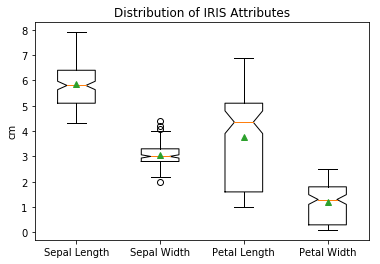

In [8]:
import matplotlib.pyplot as plt

oml.graphics.boxplot(IRIS[:, :4], notch=True, showmeans = True, 
                     labels=['Sepal Length', 'Sepal Width','Petal Length', 'Petal Width'])
plt.title('Distribution of IRIS Attributes')
plt.ylabel('cm');

# Compute attribute importance ranking of variables 
Using the IRIS table, determine which variables (a.k.a., attributes or predictors) are most important in predicting target 'Species'.

Since we're starting with a database table, we split IRIS into test and train data sets, and then separate the target from the predictors in the training set.

In the setting variable, we disable sampling. Note that OML4Py provides parameters to algorithms as name-value pairs. See the Oracle Data Mining SQL API for available options. 

Then, we define the attribute importance object, compute attribute importance using function ***fit***, and show the results, which includes the importance ranking.

Notice that petal width is most predictive of the target species. The importance value produced by this algorithms provides a relative ranking, not an absolute number, to be used to distinguish importance among variables.

In [9]:
from oml import ai

train_dat, test_dat = oml.sync(table = "IRIS").split()  # here we use sync to get handle to existing table
train_x = train_dat.drop('Species')
train_y = train_dat['Species']

setting = {'ODMS_SAMPLING':'ODMS_SAMPLING_DISABLE'}

In [10]:
ai_obj = ai(**setting)
ai_obj = ai_obj.fit(train_x, train_y)

In [11]:
ai_obj


Algorithm Name: Attribute Importance

Mining Function: ATTRIBUTE_IMPORTANCE

Settings: 
                   setting name            setting value
0                     ALGO_NAME              ALGO_AI_MDL
1                  ODMS_DETAILS              ODMS_ENABLE
2  ODMS_MISSING_VALUE_TREATMENT  ODMS_MISSING_VALUE_AUTO
3                 ODMS_SAMPLING    ODMS_SAMPLING_DISABLE
4                     PREP_AUTO                       ON

Global Statistics: 
   NUM_ROWS
0       102

Attributes: 
SEPAL_LENGTH
SEPAL_WIDTH
PETAL_LENGTH
PETAL_WIDTH

Partition: NO

Importance: 

       variable  importance  rank
0   PETAL_WIDTH    0.604724     1
1  PETAL_LENGTH    0.344505     2
2  SEPAL_LENGTH    0.061959     3
3   SEPAL_WIDTH   -0.163925     4


# Build predictive models
In this example, we set up the data and a _demo_ cost matrix to build a Random Forest model to predict Species from the IRIS table. 

Note that we create the cost matrix as a named database table, RF_COST. 

In [12]:
dat = IRIS.split()
train_x = dat[0].drop('Species')
train_y = dat[0]['Species']
test_dat = dat[1]

cost_matrix = [['setosa', 'setosa', 0],
  ['setosa', 'virginica', 0.2],
  ['setosa', 'versicolor', 0.8],
  ['virginica', 'virginica', 0],
  ['virginica', 'setosa', 0.5],
  ['virginica', 'versicolor', 0.5],
  ['versicolor', 'versicolor', 0],
  ['versicolor', 'setosa', 0.4],
  ['versicolor', 'virginica', 0.6]]
try:
    oml.drop(table='RF_COST')
except:
    pass
cost_matrix = oml.create(pd.DataFrame(cost_matrix, 
                                      columns = ['ACTUAL_TARGET_VALUE', 
                                                 'PREDICTED_TARGET_VALUE', 'COST']), 
                         "RF_COST")
cost_matrix.pull().pivot(index='ACTUAL_TARGET_VALUE', 
                         columns='PREDICTED_TARGET_VALUE',values='COST')

PREDICTED_TARGET_VALUE,setosa,versicolor,virginica
ACTUAL_TARGET_VALUE,,,
setosa,0.0,0.8,0.2
versicolor,0.4,0.0,0.6
virginica,0.5,0.5,0.0


Build a Random Forest model specifying a maximum tree depth of 4, and display model details.

Note that the model also reports attribute importance. 

In [13]:
from oml import rf

rf_mod = rf(tree_term_max_depth = '4')
rf_mod = rf_mod.fit(train_x, train_y, cost_matrix)

rf_mod


Algorithm Name: Random Forest

Mining Function: CLASSIFICATION

Target: Species

Settings: 
                    setting name            setting value
0                      ALGO_NAME       ALGO_RANDOM_FOREST
1           CLAS_COST_TABLE_NAME      "PYQUSER"."RF_COST"
2              CLAS_MAX_SUP_BINS                       32
3          CLAS_WEIGHTS_BALANCED                      OFF
4                   ODMS_DETAILS              ODMS_ENABLE
5   ODMS_MISSING_VALUE_TREATMENT  ODMS_MISSING_VALUE_AUTO
6               ODMS_RANDOM_SEED                        0
7                  ODMS_SAMPLING    ODMS_SAMPLING_DISABLE
8                      PREP_AUTO                       ON
9                 RFOR_NUM_TREES                       20
10           RFOR_SAMPLING_RATIO                       .5
11          TREE_IMPURITY_METRIC       TREE_IMPURITY_GINI
12           TREE_TERM_MAX_DEPTH                        4
13         TREE_TERM_MINPCT_NODE                      .05
14        TREE_TERM_MINPCT_SPLIT     

# Use the Random Forest model to predict Species
When predicting values, users can include _supplemental columns_ from the original data. This can be particularly useful to compare actual target values against predicted values, or to include unique keys for subsequent row identification. This is necessary since row order is not maintained on results from the database. This is consistent with how SQL and relational databases only provide ordering if requested by the user via a sort. 

In [14]:
pred = rf_mod.predict(test_dat.drop('Species'), 
                      supplemental_cols = test_dat[:, ['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'Species']])
print("Shape:",pred.shape)
pred.head(10)

Shape: (48, 5)


   SEPAL_LENGTH  SEPAL_WIDTH  PETAL_LENGTH Species PREDICTION
0           4.9          3.0           1.4  setosa     setosa
1           4.9          3.1           1.5  setosa     setosa
2           4.8          3.4           1.6  setosa     setosa
3           5.8          4.0           1.2  setosa     setosa
4           5.1          3.5           1.4  setosa     setosa
5           5.0          3.4           1.6  setosa     setosa
6           5.2          3.5           1.5  setosa     setosa
7           5.4          3.4           1.5  setosa     setosa
8           4.9          3.1           1.5  setosa     setosa
9           5.0          3.2           1.2  setosa     setosa

# Generate and display a Confusion Matrix for the predicted results
Using the overloaded ***crosstab*** function, compute the confusion matrix between the actual values in Species and the predicted result in the PREDICTION column. 

In [15]:
res_ct = pred.crosstab('Species','PREDICTION',pivot=True)
print("Type:",type(res_ct))
print("Columns:",res_ct.columns)

Type: <class 'oml.core.frame.DataFrame'>
Columns: ['Species', 'count_(setosa)', 'count_(versicolor)', 'count_(virginica)']


Since columns are sorted by name after pivot and the rows are not, sort the rows as a post-processing step.

In [16]:
res_ct.sort_values(by='Species')

      Species  count_(setosa)  count_(versicolor)  count_(virginica)
0      setosa              16                   0                  0
1  versicolor               0                  13                  2
2   virginica               0                   0                 17

# Analyze a larger data set 
Using another, but significanlty larger data set, ONTIME_S, perform a cross tabulation to determine the number of flights to each destination airport. Then, determine predictor ranking (attribute importance). 

As an exercise for the reader, continue to bulid models and score data to predict arrival delay of flights using target variable ARRDELAY.

In [17]:
ONTIME_S = oml.sync(table='ONTIME_S')
print("Type:",type(ONTIME_S))
print("Shape:",ONTIME_S.shape)

Type: <class 'oml.core.frame.DataFrame'>
Shape: (219932, 26)


Perform aggregation by counting the number of flights going to each destination airport. 

Note that result is an OML DataFrame that remains in the database, available for futher processing.

In [18]:
res = ONTIME_S.crosstab('DEST')
print("Type:",type(res))
print("Shape:",res.shape)
res.head()

Type: <class 'oml.core.frame.DataFrame'>
Shape: (325, 2)


  DEST  count
0  ABE    237
1  ABI     34
2  ABQ   1357
3  ABY     10
4  ACK      3

Compute attribute importance ranking of variables in ONTIME_S to predict ARRDELAY, then use this result to reduce the data set to the most important attributes to build models that predict ARRDELAY. Then display the attribute importance ranking. 

In [ ]:
dat = oml.sync(table = "ONTIME_S").split()  # could also just use ONTIME_S since already loaded in variable
train_x = dat[0].drop('ARRDELAY')
train_y = dat[0]['ARRDELAY']
test_dat = dat[1]

setting = {'ODMS_SAMPLING':'ODMS_SAMPLING_DISABLE'}

ai_obj2 = ai(**setting)
%time ai_obj2 = ai_obj2.fit(train_x, train_y)

In [ ]:
ai_obj2

<img src="img/Oracle-sm.jpg">